In [33]:
library(tidyverse)
library(magrittr)

### assign() : 현재 환경에서, 주어진 이름을 갖는 새로운 변수 생성

In [34]:
assign("x", 10)
x

[1] 10

### %T>% : 티파이프, 오른쪽 대신 왼쪽을 반환

 NULL


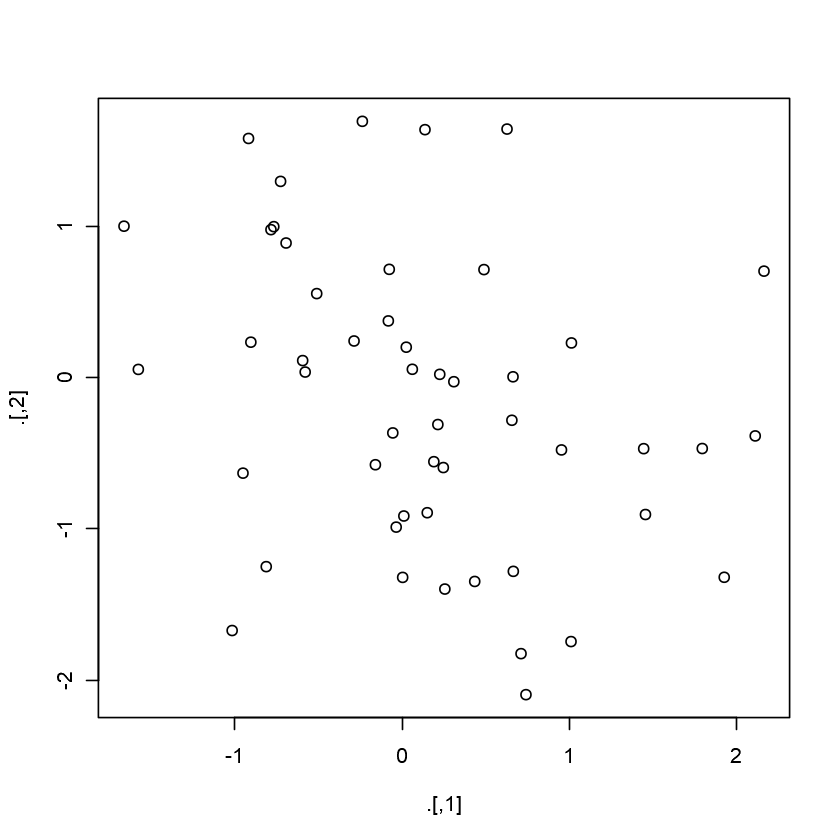

In [35]:
rnorm(100) %>% 
    matrix(ncol = 2) %>%
    plot() %>%
    str()

 num [1:50, 1:2] -0.4738 -1.3668 0.0997 -1.0572 0.4926 ...


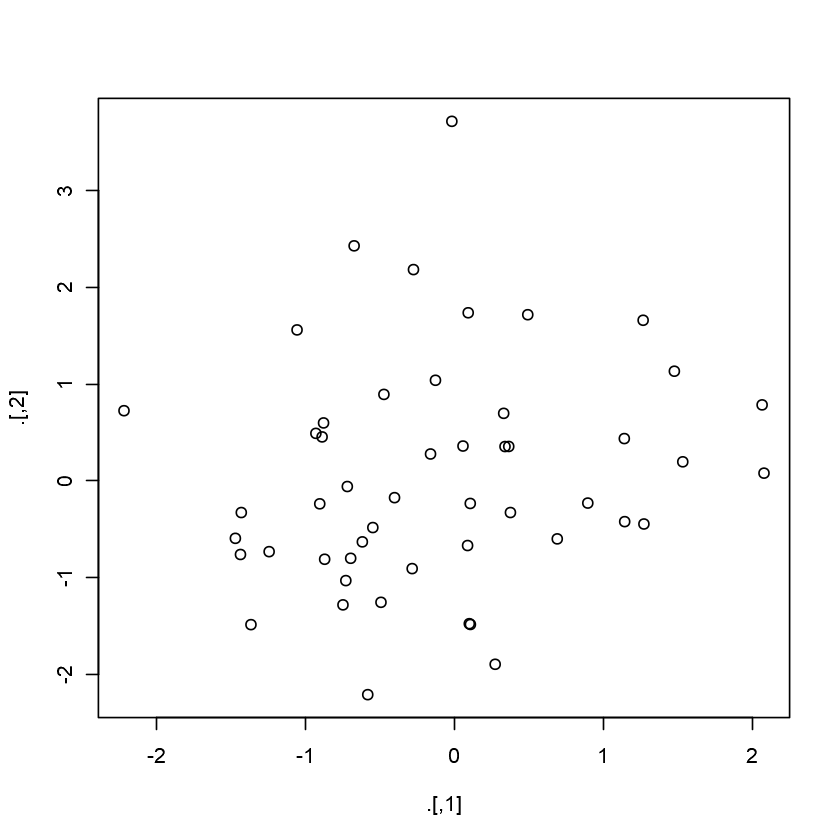

In [36]:
rnorm(100) %>%
    matrix(ncol = 2) %T>%
    plot() %>%
    str()

### %\$% : 데이터프레임의 변수를 명시적으로 참조

In [37]:
mtcars %$% cor(disp, mpg)

[1] -0.6894184

### %<>% : 할당

In [38]:
mtcars1 <- mtcars %>% transform(cyl = cyl * 2) %>% print

                   mpg  cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0  768  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0  768  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8  512  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4  768  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7 1024  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1  768  225 105 2.76 3.460 20.22  1  0    3    1


In [39]:
mtcars %<>% transform(cyl = cyl * 2) %>% print

                   mpg  cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0  768  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0  768  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8  512  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4  768  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7 1024  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1  768  225 105 2.76 3.460 20.22  1  0    3    1


### 함수

### 함수 생성의 세 가지 단계
1. 함수 이름 작명
2. function내부에 함수 입력값 나열
3. 개발한 코드를 함수의 본문에 넣는다

### 조건부 실행

```
if (조건문) {
    # 조건문이 TRUE일 때 수행되는 코드
} else {
    # 조건문이 FALSE일 때 수행되는 코드
}
```

### 다중 조건

```
if (조건1) {
    # 조건1 수행
} else if (조건2) {
    # 조건2 수행
} else {
    
}
```

### if문이 한 줄에 들어갈 정도로 짧다면 중괄호 사용X

In [49]:
y <- 10
x <- if (y < 20) "Too low" else "Too high"
x

[1] "Too low"

In [56]:
library(lubridate)
greet <- function(time = lubridate::now()) {
  hr <- lubridate::hour(time)
  if (hr < 12) {
    print("good morning")
  } else if (hr < 17) {
    print("good afternoon")
  } else {
    print("good evening")
  }
}

In [57]:
greet()
greet(ymd_h("2017-01-08:05"))

[1] "good afternoon"
[1] "good morning"


In [58]:
# 숫자가 3으로 나누어지면 fizz
# 5로 나누어지면 buzz
# 3과 5로 나누어지면 fizzbuzz
# 그렇지 않으면 숫자 반환
fizzbuzz <- function(x) {
  stopifnot(length(x) == 1)
  stopifnot(is.numeric(x))
  if (!(x %% 3) && !(x %% 5)) {
    "fizzbuzz"
  } else if (!(x %% 3)) {
    "fizz"
  } else if (!(x %% 5)) {
    "buzz"
  } else {
    as.character(x)
  }
}

In [62]:
fizzbuzz(6)
fizzbuzz(10)
fizzbuzz(15)
fizzbuzz(2)

[1] "fizz"

[1] "buzz"

[1] "fizzbuzz"

[1] "2"

### 함수 인수
- log()에서 데이터는 x, 세부사항은 로그의 base(밑)이다.
- mean()에서 데이터는 x, 세부사항은 양끝에서부터 얼마나 잘라낼 것인지 (trim)와 결측값을 어떻게 처리할 것인지 (na.rm)
- t.test()에서 데이터는 x와 y, 세부사항은 alternative(대립가설), mu, paired, var.equal, conf.level이다
- str_c()에서 문자열 아무 개수나 ...에 넣을 수 있고, 병합의 세부사항은 sep과 collapse로 제어

In [65]:
# 정규분포 근사를 이용한 평균 주위의 신뢰구간 계산
mean_ci <- function(x, conf = 0.95) {
    se <- sd(x) / sqrt(length(x))
    alpha <- 1 - conf
    mean(x) + se * qnorm(c(alpha / 2, 1 - alpha / 2))
}

x <- runif(100)
mean_ci(x)
mean_ci(x, conf = 0.99)

[1] 0.4181791 0.5285217

[1] 0.4008430 0.5458578

### 인수 이름 짓기
- x, y, z : 벡터
- w : 가중치 벡터
- df : 데이터프레임
- i, j : 수치형 인덱스
- n : 길이 혹은 행 개수
- p : 열 개수

### 값 확인하기

In [69]:
# 가중 요약 통계량
wt_mean <- function(x, w) {
    if (length(x) != length(w)) {
        stop("'x'와 'w'는 길이가 같아야 함", call. = F)
    }
    sum(x * w) / sum(w)
}

wt_var <- function(x, w) {
    mu <- wt_mean(x, w)
    sum(w * (x - mu) ^ 2) / sum(w)
}

wt_sd <- function(x, w) {
    sqrt(wt_var(x, w))
}

In [70]:
wt_mean(1:6, 1:3)

ERROR: Error: 'x'와 'w'는 길이가 같아야 함


### 점-점-점(...)

In [73]:
commas <- function(...) stringr::str_c(..., collapse = ", ")
commas(letters)

[1] "a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z"

In [82]:
rule <- function(..., pad = "-") {
  title <- paste0(...)
  width <- getOption("width") - nchar(title) - 5
  cat(title, " ", stringr::str_dup(pad, width), "\n", sep = "")
}
rule("주요 출력")

주요 출력 ----------------------------------------------------------------------


### 벡터

### - 원자 벡터 : 논리형, 정수형, 더블형, 문자형, 복소수형, 원시형
### - 리스트 : 재귀벡터

<img src = "https://bookdown.org/sulgi/r4ds/diagrams/data-structures-overview.png">

### typeof()  ; 유형 확인
### length() : 길이 확인

In [84]:
typeof(letters)
typeof(1:10)

[1] "character"

[1] "integer"

### 수치형
- R에서 숫자는 기본값으로 더블형
- 정수형으로 만들려면 숫자 뒤에 L을 붙임

In [85]:
typeof(1)
typeof(1L)

[1] "double"

[1] "integer"

| | 0 | Inf | NA | NaN 
| -- | -- | -- | -- | -- |
is.finite() | x | | | |
is.infinite() | | x | |
is.na() | | | x | x |
is.nan() | | | | x |

### 문자형

### 결측값

In [86]:
NA # 논리형
NA_integer_ # 정수형
NA_real_ # 더블형
NA_character_ # 문자형

[1] NA

[1] NA

[1] NA

[1] NA

### 테스트 함수

| | 논리형 | 정수형 | 더블형 | 문자형 | 리스트 |
| -- | -- | -- | -- | -- | -- |
is_logical() | x | | | | |
is_integer() | | x | | | |
is_double() | | | x | | |
is_numeric() | | x | x | | |
is_character() | | | | x | |
is_atomic() | x | x | x | x | |
is_list() | | | | |x |
is_vector() | x | x | x | x | x |

### 리스트
- 리스트는 객체들을 혼합하여 포함 가능
- 다른 리스트를 포함 가능

In [90]:
print(x <- list(1, 2, 3))

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3



In [91]:
str(x)

List of 3
 $ : num 1
 $ : num 2
 $ : num 3


In [92]:
x_named <- list(a = 1, b = 2, c = 3)
str(x_named)

List of 3
 $ a: num 1
 $ b: num 2
 $ c: num 3


In [93]:
y <- list("a", 1L, 1.5, TRUE)
str(y)

List of 4
 $ : chr "a"
 $ : int 1
 $ : num 1.5
 $ : logi TRUE


In [94]:
z <- list(list(1, 2), list(3, 4))
str(z)

List of 2
 $ :List of 2
  ..$ : num 1
  ..$ : num 2
 $ :List of 2
  ..$ : num 3
  ..$ : num 4


In [95]:
x1 <- list(c(1, 2), c(3, 4))
x2 <- list(list(1, 2), list(3, 4))
x3 <- list(1, list(2, list(3)))

### 서브셋

In [96]:
a <- list(a = 1:3, b = "a string", c = pi, d = list(-1, -5))
str(a)

List of 4
 $ a: int [1:3] 1 2 3
 $ b: chr "a string"
 $ c: num 3.14
 $ d:List of 2
  ..$ : num -1
  ..$ : num -5


### 속성
### attributes()

In [98]:
x <- 1:10
attr(x, "greeting")
attr(x, "greeting") <- "Hi!"
attr(x, "farewell") <- "Bye!"
attributes(x)

NULL

$greeting
[1] "Hi!"

$farewell
[1] "Bye!"

### methods() : 제네릭의 모든 메서드 나열

In [101]:
methods("as.Date")

[1] as.Date.character   as.Date.default     as.Date.factor     
[4] as.Date.numeric     as.Date.POSIXct     as.Date.POSIXlt    
[7] as.Date.vctrs_sclr* as.Date.vctrs_vctr*
see '?methods' for accessing help and source code

In [102]:
getS3method("as.Date", "default")

function (x, ...) 
{
    if (inherits(x, "Date")) 
        x
    else if (is.null(x)) 
        .Date(numeric())
    else if (is.logical(x) && all(is.na(x))) 
        .Date(as.numeric(x))
    else stop(gettextf("do not know how to convert '%s' to class %s", 
        deparse1(substitute(x)), dQuote("Date")), domain = NA)
}
<bytecode: 0x0000000023d17b30>
<environment: namespace:base>

In [103]:
getS3method("as.Date", "numeric")

function (x, origin, ...) 
{
    if (missing(origin)) {
        if (!length(x)) 
            return(.Date(numeric()))
        if (!any(is.finite(x))) 
            return(.Date(x))
        stop("'origin' must be supplied")
    }
    as.Date(origin, ...) + x
}
<bytecode: 0x0000000014fa7cc8>
<environment: namespace:base>

### 확장 벡터
- 팩터형
- 데이트형
- 데이트-타임형
- 티블

### 팩터형

In [104]:
x <- factor(c("ab", "cd", "ab", levels = c("ab", "cd", "ef")))

In [106]:
typeof(x)
attributes(x)

[1] "integer"

$names
[1] ""        ""        ""        "levels1" "levels2" "levels3"

$levels
[1] "ab" "cd" "ef"

$class
[1] "factor"

### 데이트형과 데이트-타임형

In [107]:
x <- as.Date("1971-01-01")
unclass(x)
typeof(x)
attributes(x)

[1] 365

[1] "double"

$class
[1] "Date"

In [108]:
x <- lubridate::ymd_hm("1970-01-01 01:00")
unclass(x)
typeof(x)
attributes(x)

[1] 3600
attr(,"tzone")
[1] "UTC"

[1] "double"

$class
[1] "POSIXct" "POSIXt" 

$tzone
[1] "UTC"

In [111]:
attr(x, "tzone") <-  "US/Pacific"
x

[1] "1969-12-31 17:00:00 PST"

In [112]:
attr(x, "tzone") <- "US/Eastern"
x

[1] "1969-12-31 20:00:00 EST"

In [114]:
y <- as.POSIXlt(x)
typeof(y)
attributes(y)

[1] "list"

$names
 [1] "sec"    "min"    "hour"   "mday"   "mon"    "year"   "wday"   "yday"  
 [9] "isdst"  "zone"   "gmtoff"

$class
[1] "POSIXlt" "POSIXt" 

$tzone
[1] "US/Eastern" "EST"        "EDT"

### 티블
- tbl_df, tbl, data.frame의 세 가지 클래스를 가짐

In [115]:
tb <- tibble::tibble(x = 1:5, y = 5:1)
typeof(tb)
attributes(tb)

[1] "list"

$class
[1] "tbl_df"     "tbl"        "data.frame"

$row.names
[1] 1 2 3 4 5

$names
[1] "x" "y"

In [116]:
df <- data.frame(x = 1:5, y = 5:1)
typeof(df)
attributes(df)

[1] "list"

$names
[1] "x" "y"

$class
[1] "data.frame"

$row.names
[1] 1 2 3 4 5

### purrr (반복작업)

### seq_along() = 1:length()

In [123]:
seq_along(mtcars)

[1]  1  2  3  4  5  6  7  8  9 10 11

In [117]:
df <- tibble(
    a = rnorm(10), 
    b = rnorm(10),
    c = rnorm(10),
    d = rnorm(10)
)

In [122]:
output <- vector()
for (i in seq_along(df)) {
    output[i] <- median(df[[i]])
}
output

[1] -0.4158885  0.2266763 -1.1065285  0.1758848

In [140]:
# 17.2.1
# 1 
output <- vector()
for (i in seq_along(mtcars)) {
    output[i] = mean(mtcars[[i]])
}
names(output) <- names(mtcars)
output

mpg        cyl       disp         hp       drat         wt       qsec 
 20.500000 768.000000 211.833333 117.166667   3.440000   2.988333  18.128333 
        vs         am       gear       carb 
  0.500000   0.500000   3.500000   2.166667

In [130]:
# 2
library(nycflights13)

In [143]:
output <- vector()
for (i in seq_along(flights)) {
    output[i] = class(flights[[i]])
}
names(output) <- names(flights)
output

Warning message in output[i] <- class(flights[[i]]):
"number of items to replace is not a multiple of replacement length"


year          month            day       dep_time sched_dep_time 
     "integer"      "integer"      "integer"      "integer"      "integer" 
     dep_delay       arr_time sched_arr_time      arr_delay        carrier 
     "numeric"      "integer"      "integer"      "numeric"    "character" 
        flight        tailnum         origin           dest       air_time 
     "integer"    "character"    "character"    "character"      "numeric" 
      distance           hour         minute      time_hour 
     "numeric"      "numeric"      "numeric"      "POSIXct"

In [147]:
output <- vector()
for (i in seq_along(iris)) {
    output[i] <- n_distinct(iris[[i]])
}
names(output) <- names(iris)
output

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
          35           23           43           22            3

In [153]:
matrix(rnorm(n * length(mu), mean = mu), ncol = n)

-10.179790,-9.80069172,-9.3129854,-11.46022471,-10.970595,-11.0655983,-8.824246,-10.9100458,-9.783923,-10.914916
1.800185,0.02183241,0.1386156,-0.01205496,-1.048088,0.3916807,1.168374,-0.3323363,-1.656311,1.495425
8.180900,9.71082065,11.4030768,9.78744465,9.793952,10.9058073,11.013414,8.5522379,9.121883,9.397327
99.436851,100.69596313,100.7234395,100.73915551,99.439263,98.8973304,100.256797,100.9843460,99.678774,98.352976


### 맵 함수 (apply 함수와 유사)

### map() : 리스트 출력
### map_lgl() : 논리형 벡터 출력
### map_int() : 정수형 벡터 출력
### map_dbl() : 더블형 벡터 출력
### map_chr() : 문자형 벡터 출력

In [160]:
df %>% map_dbl(mean)
df %>% map_dbl(median)
df %>% map_dbl(sd)

a          b          c          d 
-0.3668602  0.1953621 -0.9946533  0.1594668

a          b          c          d 
-0.4158885  0.2266763 -1.1065285  0.1758848

a         b         c         d 
0.9387192 1.1048679 0.5671231 1.2277951

In [161]:
map_dbl(df, mean, trim = 0.5)

a          b          c          d 
-0.4158885  0.2266763 -1.1065285  0.1758848

In [162]:
z <- list(x = 1:3, y = 4:5)
map_int(z, length)

x y 
3 2

### 단축어

In [163]:
models <- mtcars %>% 
    split(.$cyl) %>%
    map(function(df) lm(mpg ~ wt, data = df))

In [165]:
models <- mtcars %>%
    split(.$cyl) %>%
    map(~lm(mpg ~ wt, data = .))
models

$`512`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
       22.8           NA  


$`768`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     28.835       -2.781  


$`1024`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
       18.7           NA  



In [171]:
models %>% map(summary) %>% map_dbl(~.$r.squared)

512       768      1024 
0.0000000 0.4530369 0.0000000

In [172]:
models %>% map(summary) %>% map_dbl("r.squared")

512       768      1024 
0.0000000 0.4530369 0.0000000

In [174]:
x <- list(list(1, 2, 3), list(4, 5, 6), list(7, 8, 9))
x %>% map_dbl(2)

[1] 2 5 8

### 베이스 R

- lapply()는 map()과 기본적으로 같다. 차이점은 map()은 purrr의 다른 모든 함수와 일관성이 있고 .f에 단축어를 사용할 수 있다는 것
- 베이스 sapply() 는 lapply() 의 출력을 자동으로 단순하게 만드는 래퍼이다. 이 함수는 대화식 작업에서는 유용하지만, 함수 안에서는 다음과 같이 어떤 출력을 얻게 될지 모르기 때문에 문제가 된다:
- vapply() 는 유형을 정의하는 추가 인수를 제공하기 때문에 sapply() 의 안전한 대체함수이다. vapply() 의 유일한 문제는 타이핑을 길게 해야 한다는 것이다. vapply(df, is.numeric, logical(1)) 은 map_lgl(df, is.numeric) 과 동일하다. vapply() 가 purrr의 맵 함수보다 좋은 점은 행렬을 만들 수도 있다는 것이다. 맵 함수는 벡터만 만들 수 있다.

In [175]:
x1 <- list(
  c(0.27, 0.37, 0.57, 0.91, 0.20),
  c(0.90, 0.94, 0.66, 0.63, 0.06), 
  c(0.21, 0.18, 0.69, 0.38, 0.77)
)
x2 <- list(
  c(0.50, 0.72, 0.99, 0.38, 0.78), 
  c(0.93, 0.21, 0.65, 0.13, 0.27), 
  c(0.39, 0.01, 0.38, 0.87, 0.34)
)

In [176]:
threshold <- function(x, cutoff = 0.8) x[x > cutoff]
x1 %>% sapply(threshold) %>% str()
x2 %>% sapply(threshold) %>% str()


List of 3
 $ : num 0.91
 $ : num [1:2] 0.9 0.94
 $ : num(0) 
 num [1:3] 0.99 0.93 0.87


In [185]:
# 17.5.3
map(mtcars, mean) %>% unlist

mpg        cyl       disp         hp       drat         wt       qsec 
 20.500000 768.000000 211.833333 117.166667   3.440000   2.988333  18.128333 
        vs         am       gear       carb 
  0.500000   0.500000   3.500000   2.166667

In [182]:
map(flights, class) %>% unlist

year          month            day       dep_time sched_dep_time 
     "integer"      "integer"      "integer"      "integer"      "integer" 
     dep_delay       arr_time sched_arr_time      arr_delay        carrier 
     "numeric"      "integer"      "integer"      "numeric"    "character" 
        flight        tailnum         origin           dest       air_time 
     "integer"    "character"    "character"    "character"      "numeric" 
      distance           hour         minute     time_hour1     time_hour2 
     "numeric"      "numeric"      "numeric"      "POSIXct"       "POSIXt"

In [184]:
map(iris, n_distinct) %>% unlist

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
          35           23           43           22            3

In [186]:
map(c(-10, 0, 10, 100), ~rnorm(n = 10, mean = .))

[[1]]
 [1]  -7.443914 -10.825714  -9.911472 -10.495408 -10.069613 -11.150782
 [7] -10.684007  -7.846214 -10.860720  -9.053798

[[2]]
 [1]  0.8066752 -0.9715258  2.6406177 -0.2393548  0.7407501  0.7590725
 [7] -1.0533136  0.2677144 -0.3879145 -0.2857966

[[3]]
 [1] 10.764482  8.753337  9.231486 11.524093  9.786999 11.117228  8.759872
 [8]  9.206708  7.735837 11.308675

[[4]]
 [1] 100.54727 100.91883 100.73652  99.89070  98.85079  99.67636 100.48551
 [8] 101.71145  99.62655  99.91145

In [190]:
map(diamonds, is.factor) %>% unlist

carat     cut   color clarity   depth   table   price       x       y       z 
  FALSE    TRUE    TRUE    TRUE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE

In [191]:
map(1:5, runif)

[[1]]
[1] 0.07950938

[[2]]
[1] 0.6485491 0.9778208

[[3]]
[1] 0.6569490 0.8144151 0.5464679

[[4]]
[1] 0.33155579 0.30909334 0.97665300 0.03285366

[[5]]
[1] 0.8081322 0.6824904 0.4874364 0.8598190 0.5446696

In [192]:
map(-2:2, rnorm, n = 5)
map_dbl(-2:2, rnorm , n = 5)

[[1]]
[1] -2.843617 -1.424820 -4.207255 -1.378579 -4.626638

[[2]]
[1]  0.62038019 -0.25194335 -1.08325073 -0.07127382 -0.64028501

[[3]]
[1] -1.33113512  0.11930850 -1.60082844  1.77333725 -0.08997039

[[4]]
[1] 2.7030435 1.1309558 1.0600849 0.6239988 0.8945340

[[5]]
[1] 1.5584542 0.6022520 2.8396167 0.2995341 1.4004527

ERROR: [1m[33mError[39m in [1m[1m`stop_bad_type()`:[22m
[33m![39m Result 1 must be a single double, not a double vector of length 5


### 다중 인수로 매핑

In [195]:
mu <- list(5, 10, -3)
mu %>% map(rnorm, n = 5) %>% str()

List of 3
 $ : num [1:5] 5.23 4.1 3.75 4.78 4.11
 $ : num [1:5] 11.06 8.44 9.82 10.2 10.94
 $ : num [1:5] -3.06 -2.36 -4.8 -2.99 -3.25


In [196]:
sigma <- list(1, 5, 10)
seq_along(mu) %>% map(~rnorm(5, mu[[.]], sigma[[.]])) %>% str()

List of 3
 $ : num [1:5] 4.69 4.67 5.28 5.88 5.77
 $ : num [1:5] -3.28 6.54 11.58 10.04 11.2
 $ : num [1:5] 2.552 -11.534 -0.345 9.214 -0.493


### map2() : 두 개의 벡터를 다라 병렬로 반복 적용

In [197]:
map2(mu, sigma, rnorm, n = 5) %>% str()

List of 3
 $ : num [1:5] 5.05 6.22 6.64 6.37 4.8
 $ : num [1:5] 10.4 12.7 10.8 8.6 11
 $ : num [1:5] 2.99 1.44 18.85 -6.39 -6.68


<img src = "https://bookdown.org/sulgi/r4ds/diagrams/lists-map2.png">

### pmap()

In [207]:
n <- list(1, 3, 5)
(args1 <- list(n = n, mean = mu, sd = sigma))

$n
$n[[1]]
[1] 1

$n[[2]]
[1] 3

$n[[3]]
[1] 5


$mean
$mean[[1]]
[1] 5

$mean[[2]]
[1] 10

$mean[[3]]
[1] -3


$sd
$sd[[1]]
[1] 1

$sd[[2]]
[1] 5

$sd[[3]]
[1] 10

In [208]:
args1 %>% pmap(rnorm) %>% str()

List of 3
 $ : num 3.44
 $ : num [1:3] 3.32 4.1 12.68
 $ : num [1:5] 5.211 -10.302 -2.734 0.512 -21.217


<img src = "https://bookdown.org/sulgi/r4ds/diagrams/lists-pmap-unnamed.png">

In [209]:
params <- tribble(
    ~n, ~mean, ~sd,
    1, 5, 1,
    3, 10, 5,
    5, -3, 10
) %>% print

# A tibble: 3 x 3
      n  mean    sd
  <dbl> <dbl> <dbl>
1     1     5     1
2     3    10     5
3     5    -3    10


In [210]:
params %>% pmap(rnorm)

[[1]]
[1] 3.307064

[[2]]
[1] 6.073160 8.212084 7.829880

[[3]]
[1]  -2.170915 -15.351278  20.241573  17.380705  -1.323357

<img src = "https://bookdown.org/sulgi/r4ds/diagrams/lists-pmap-named.png">

### 다른 함수 불러오기
### invoke_map() : 인수를 변경하는 것뿐만 아니라 함수 자체도 변경

In [213]:
f <- c("runif", "rnorm", "rpois")
params <- list(
    list(min = -1, max = 1),
    list(sd = 5),
    list(lambda = 10)
)

In [214]:
invoke_map(f, params, n = 5)

[[1]]
[1] -0.1556799 -0.7661938 -0.1587206 -0.6608639  0.2624736

[[2]]
[1]  5.6961531 -3.6419070 -2.4122008 -0.5029059 -1.6952343

[[3]]
[1]  8  7 15  8 16

<img src = "https://bookdown.org/sulgi/r4ds/diagrams/lists-invoke.png">

In [215]:
sim <- tribble(
    ~f, ~params,
    "runif", list(min = -1, max = 1),
    "rnorm", list(sd = 5),
    "rpois", list(lambda = 10)
)
sim %>% mutate(sim = invoke_map(f, params, n = 10))

f,params,sim
<chr>,<list>,<list>
runif,"-1, 1","-0.69299383, 0.85093303, -0.25160960, 0.09099740, -0.09946164, 0.71603265, -0.04009149, -0.15312017, 0.98484478, -0.36787917"
rnorm,5,"1.570727, 2.473440, 4.562020, -6.964862, 5.282600, 9.692541, -3.494328, 3.035954, -3.574844, 2.270193"
rpois,10,"7, 11, 13, 15, 7, 8, 13, 14, 10, 8"


### 워크(walk)
- 반환값이 아닌 부작용을 위해 함수를 호출하고자 할 경우 맵 함수의 대안으로 사용 가능
- 결과를 스크린에 랜더링하거나 디스크에 파일을 저장

### walk()

In [216]:
x <- list(1, "a", 3)
x %>% walk(print)

[1] 1
[1] "a"
[1] 3


### pwalk() : 첫 번째 인수 .x를 보이지 않게 반환, 파이프라인 중간에서 사용하기 적절

In [229]:
library(ggplot2)
plots <- mtcars %>% 
    split(.$cyl) %>%
    map(~ggplot(., aes(mpg, wt)) + geom_point())
paths <- stringr::str_c(names(plots), ".pdf")

paths # 파일이름

[1] "512.pdf"  "768.pdf"  "1024.pdf"

In [230]:
pwalk(list(paths, plots), ggsave, path = getwd())

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



### For 루프의 기타 패턴

### 논리서술자 함수
### keep() : 입력에서 논리서술이 각각 TRUE를 반환
### discard() : 입력에서 논리서술이 각각 FALSE인 요소를 반환

In [232]:
iris %>% keep(is.factor) %>% str()

'data.frame':	150 obs. of  1 variable:
 $ Species: Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [233]:
iris %>% discard(is.factor) %>% str()

'data.frame':	150 obs. of  4 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...


### some() : 논리서술이 일부 요소가 TRUE인지 확인
### every() : 논리서술이 모든 요소가 TRUE인지 확인

In [237]:
(x <- list(1:5, letters, list(10)))

x %>% some(is_character)
x %>% every(is_character)

[[1]]
[1] 1 2 3 4 5

[[2]]
 [1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

[[3]]
[[3]][[1]]
[1] 10

[1] TRUE

[1] FALSE

### detect() : 논리서술이 TRUE인 첫 번째 요소를 탐색
### detect_index() : 해당 위치를 반환

In [247]:
set.seed(1000)
(x <- sample(10))

x %>% detect(~ . > 5)
x %>% detect_index(~ . > 5)

[1]  4  6  3  5  8  7  2 10  9  1

[1] 6

[1] 2

### head_while() : 벡터의 시작에서부터 논리서술자가TRUE인 요소를 반환
### tail_while() : 벡터의 끝에서부터 논리서술자가 TRUE인 요소를 반환

In [248]:
x %>% head_while(~ . > 5)
x %>% tail_while(~ . > 5)

integer(0)

integer(0)

### 리듀스와 누적

### reduce() : 쌍을 객체 하나로 줄이는 함수
- 이진함수를 입력으로, 이를 하나의 요소만 남아있을 때까지 반복적으로 리스트에 적용

In [249]:
dfs <- list(
  age = tibble(name = "John", age = 30),
  sex = tibble(name = c("John", "Mary"), sex = c("M", "F")),
  trt = tibble(name = "Mary", treatment = "A")
) %>% print

$age
# A tibble: 1 x 2
  name    age
  <chr> <dbl>
1 John     30

$sex
# A tibble: 2 x 2
  name  sex  
  <chr> <chr>
1 John  M    
2 Mary  F    

$trt
# A tibble: 1 x 2
  name  treatment
  <chr> <chr>    
1 Mary  A        



In [250]:
dfs %>% reduce(full_join)

Joining, by = "name"
Joining, by = "name"


name,age,sex,treatment
<chr>,<dbl>,<chr>,<chr>
John,30,M,NA
Mary,NA,F,A


In [251]:
vs <- list(
    c(1, 3, 5, 6, 10),
    c(1, 2, 3, 7, 8, 10),
    c(1, 2, 3, 4, 8, 9, 10)
) %>% print

[[1]]
[1]  1  3  5  6 10

[[2]]
[1]  1  2  3  7  8 10

[[3]]
[1]  1  2  3  4  8  9 10



In [252]:
vs %>% reduce(intersect)

[1]  1  3 10

### accumulate() : 누적합

In [257]:
(x <- sample(10))

[1]  2  1  9  3  5  7  4  6 10  8

In [274]:
x %>% accumulate(add)

[1]  2  3 12 15 20 27 31 37 47 55